---
author: Juma Shafara
date: "2024-08-07"
title: Training Two Parameter Stochastic Gradient Descent
keywords: []
description: In this Lab, you will practice training a model by using Stochastic Gradient
--- 

![Photo by DATAIDEA](../../assets/banner4.png)

<h2>Linear regression 1D: Training Two Parameter Stochastic Gradient Descent (SGD)</h2>


<h2>Objective</h2><ul class="cursored-list"><li><i class="bi bi-cursor"></i> How to use SGD(Stochastic Gradient Descent) to train the model.</li></ul> 


<h2>Table of Contents</h2>
<p>In this Lab, you will practice training a model by using Stochastic Gradient descent.</p>

<ul class='cursored-list'>
    <li><a href="#Makeup_Data"><i class="bi bi-cursor"></i>Make Some Data</a></li>
    <li><a href="#Model_Cost"><i class="bi bi-cursor"></i>Create the Model and Cost Function (Total Loss)</a></li>
    <li><a href="#BGD"><i class="bi bi-cursor"></i>Train the Model:Batch Gradient Descent</a></li>
    <li><a href="#SGD"><i class="bi bi-cursor"></i>Train the Model:Stochastic gradient descent</a></li>
    <li><a href="#SGD_Loader"><i class="bi bi-cursor"></i>Train the Model:Stochastic gradient descent with Data Loader</a></li>
</ul>
<p>Estimated Time Needed: <strong>30 min</strong></p>

<hr>


<!-- Newsletter -->
<div class="newsletter">
<div class="newsletter-heading">
<h4><i class="bi bi-info-circle-fill"></i> Don't Miss Any Updates!</h4>
</div>
<div class="newsletter-body">
<p>
Before we continue, I have a humble request, to be among the first to hear about future updates of the course materials, simply enter your email below, follow us on <a href="https://x.com/dataideaorg"><i class="bi bi-twitter-x"></i>
(formally Twitter)</a>, or subscribe to our <a href="https://www.youtube.com/@dataidea-science"><i class="bi bi-youtube"></i> YouTube channel</a>.
</p>
<iframe class="newsletter-frame" src="https://embeds.beehiiv.com/5fc7c425-9c7e-4e08-a514-ad6c22beee74?slim=true" data-test-id="beehiiv-embed" height="52" frameborder="0" scrolling="no">
</iframe>
</div>
</div>

<h2>Preparation</h2>


We'll need the following libraries:  


In [2]:
# These are the libraries we are going to use in the lab.

import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from dataidea_science.plots import plot_error_surfaces

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with PyTorch.


<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2>


Set random seed: 


In [6]:
# Set random seed

torch.manual_seed(1)

Generate values from <i>-3</i> to <i>3</i> that create a line with a slope of <i>1</i> and a bias of <i>-1</i>. This is the line that you need to estimate. Add some noise to the data:


In [7]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

Plot the results:


In [8]:
# Plot out the data dots and line
from dataidea.models import *

<!--Empty Space for separating topics-->


<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


Define the <code>forward</code> function:


In [9]:
# Define the forward function

def forward(x):
    return w * x + b

Define the cost or criterion function (MSE): 


In [10]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


<Figure size 640x480 with 0 Axes>

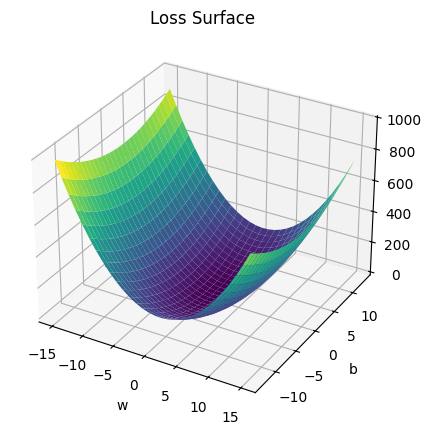

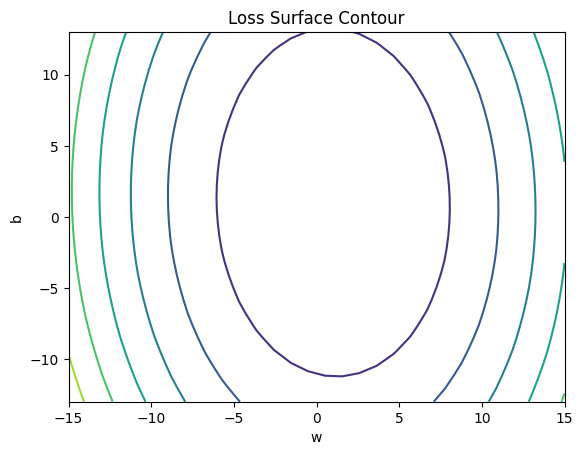

In [11]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

<!--Empty Space for separating topics-->


<h2 id="BGD">Train the Model: Batch Gradient Descent</h2>


Create model parameters <code>w</code>, <code>b</code> by setting the argument <code>requires_grad</code> to True because the system must learn it.


In [9]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Set the learning rate to  0.1 and create an empty list <code>LOSS</code> for storing the loss for each iteration.


In [10]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

Define <code>train_model</code> function for train the model.


In [11]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Run 10 epochs of batch gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


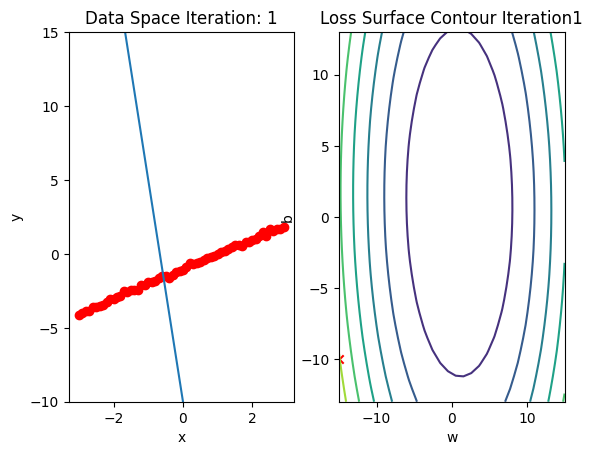

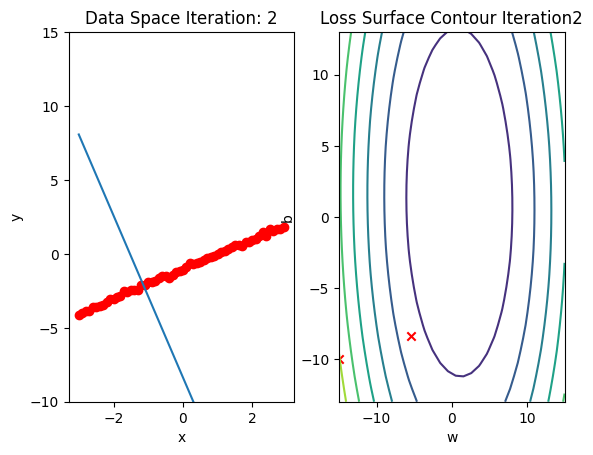

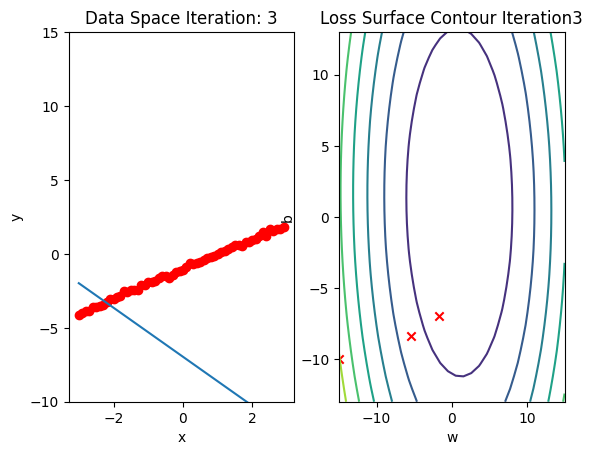

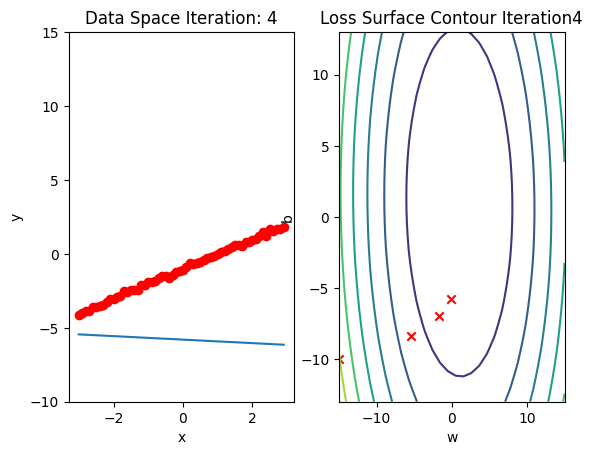

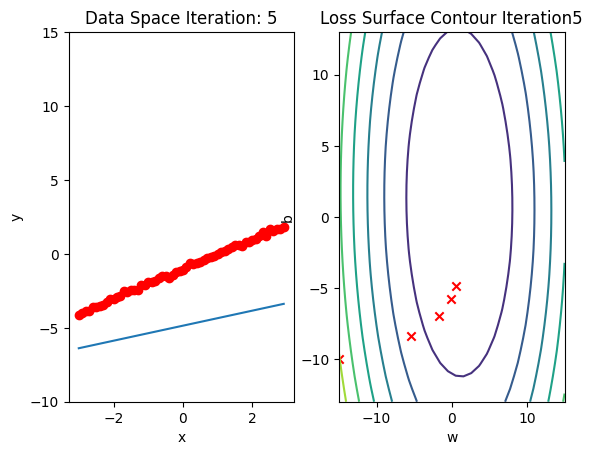

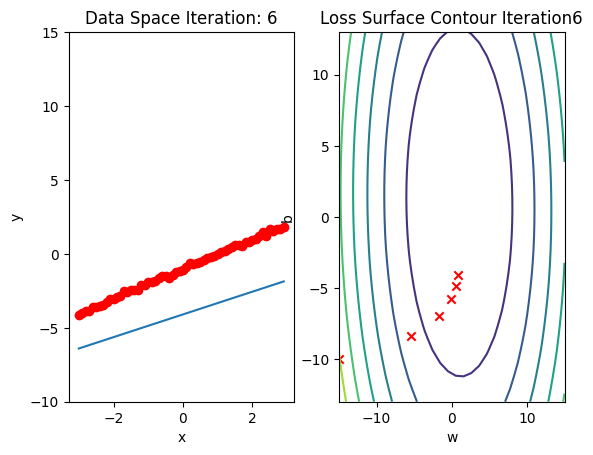

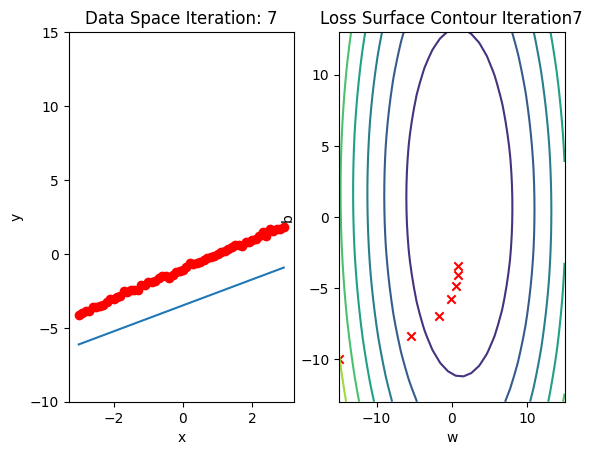

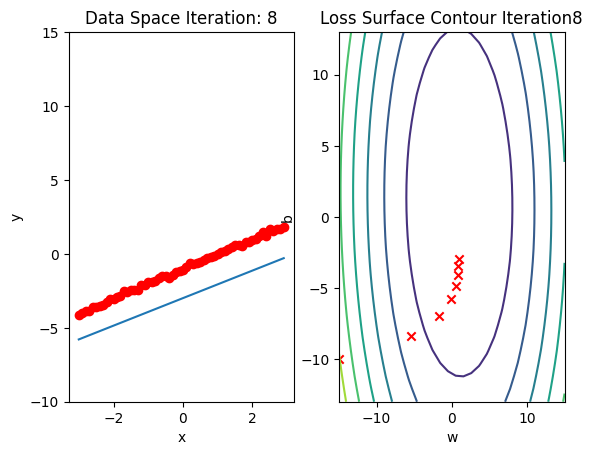

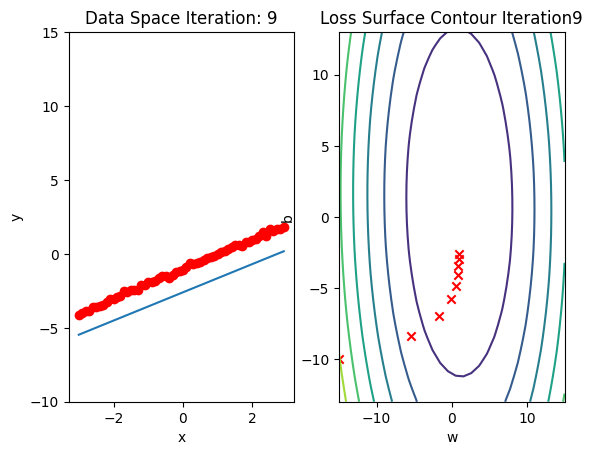

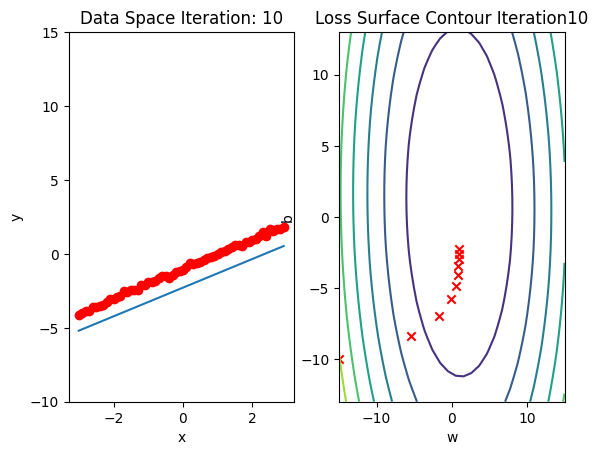

In [12]:
# Train the model with 10 iterations

train_model(10)

<!--Empty Space for separating topics-->


<h2 id="SGD">Train the Model: Stochastic Gradient Descent</h2>


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [13]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Define <code>train_model_SGD</code> function for training the model.


In [13]:
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


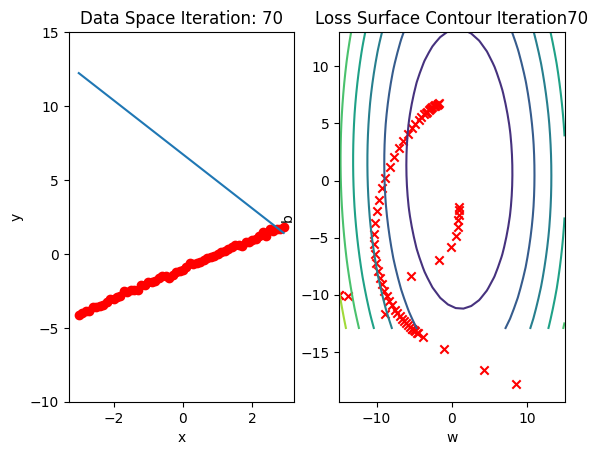

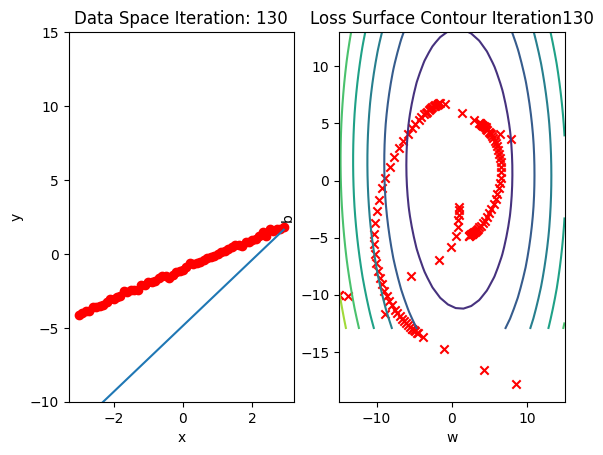

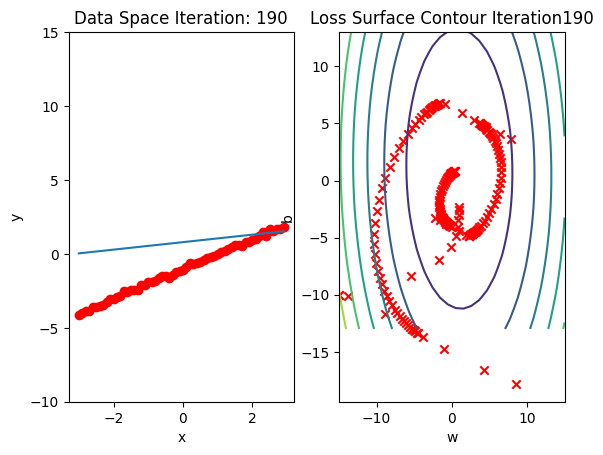

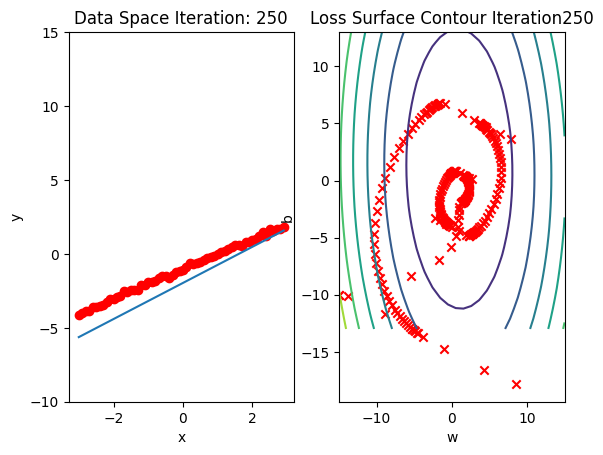

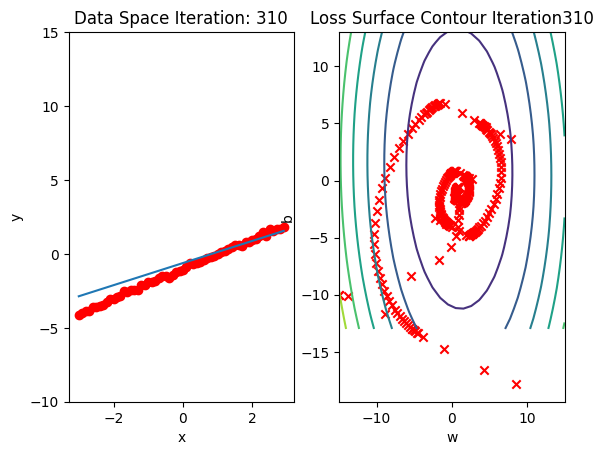

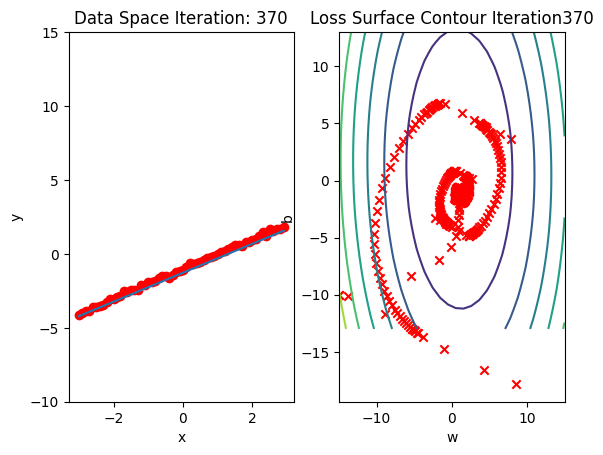

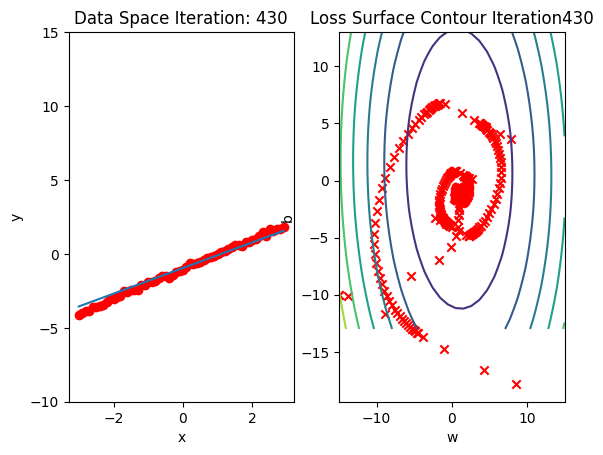

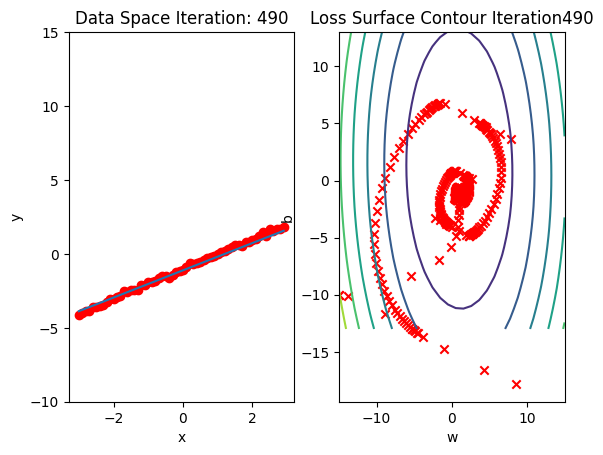

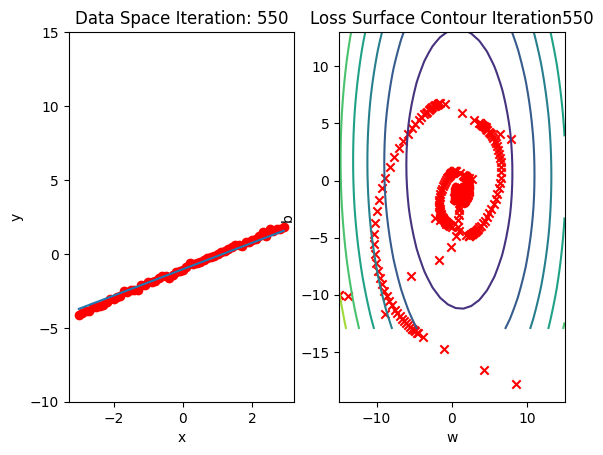

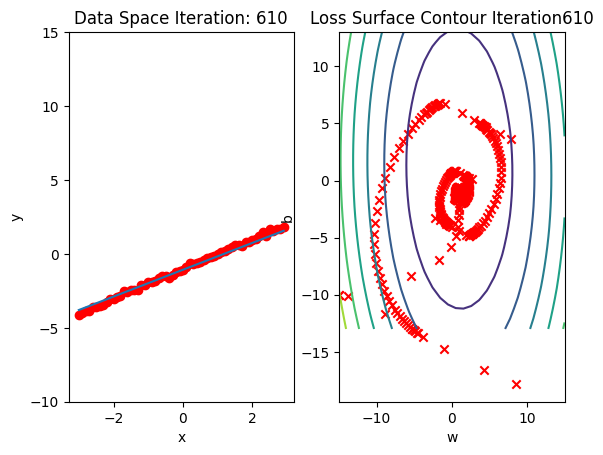

In [14]:
# Train the model with 10 iterations

train_model_SGD(10)

Compare the loss of both batch gradient descent as SGD.


In [ ]:
LOSS_BGD_ = [loss.item() for loss in LOSS_BGD]

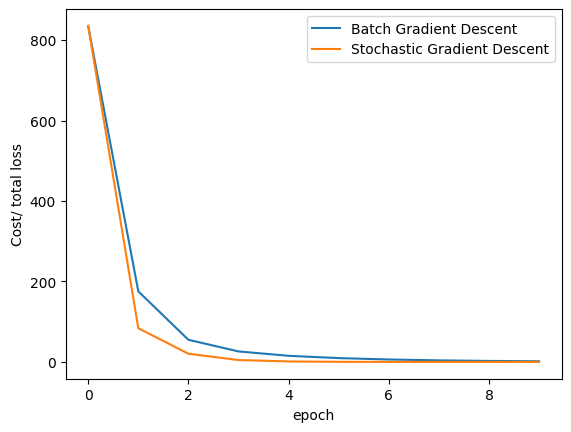

In [39]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD_,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="SGD_Loader">SGD with Dataset DataLoader</h2>


Import the module for building a dataset class: 


In [29]:
# Import the library for DataLoader

from torch.utils.data import Dataset, DataLoader

Create a dataset class:


In [30]:
# Dataset Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

Create a dataset object and check the length of the dataset.


In [31]:
# Create the dataset and check the length

dataset = Data()
print("The length of dataset: ", len(dataset))

The length of dataset:  60


Obtain the first training point:  


In [32]:
# Print the first point

x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


Similarly, obtain the first three training points:  


In [33]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


Create a <code>plot_error_surfaces</code> object to visualize the data space and the parameter space during training:


In [34]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

Create a <code>DataLoader</code> object by using the constructor: 


In [35]:
# Create DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

Define <code>train_model_DataLoader</code> function for training the model.


In [36]:
# The function for training the model

w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)
        
        # store the loss 
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader:
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            
            # Updata parameters slope
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data
            
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

Run 10 epochs of stochastic gradient descent: <b>bug</b> data space is 1 iteration ahead of parameter space. 


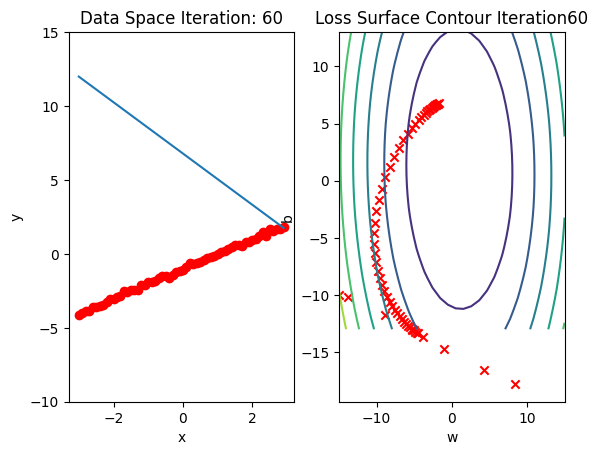

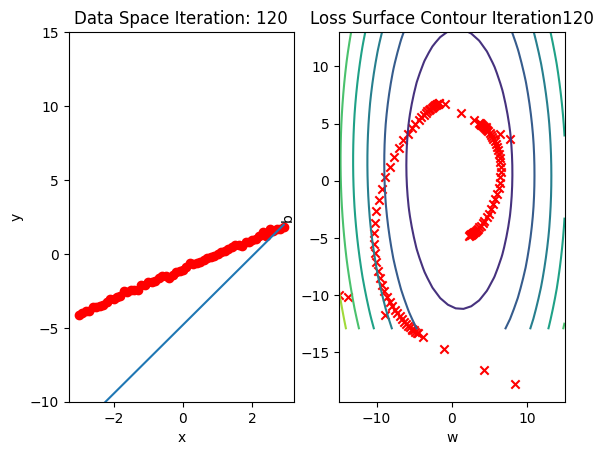

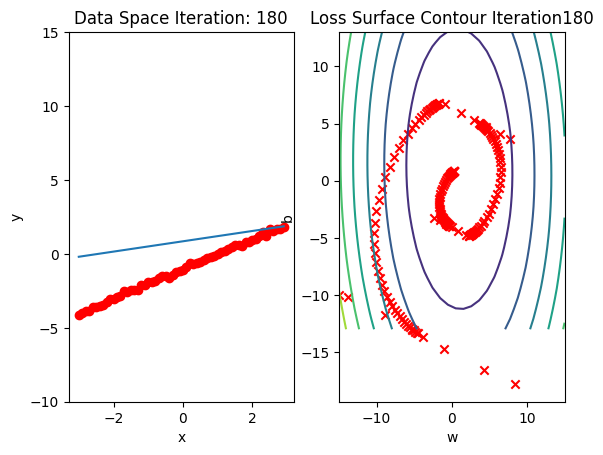

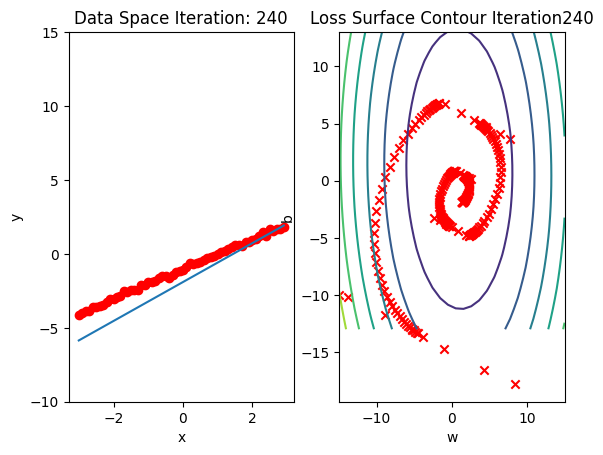

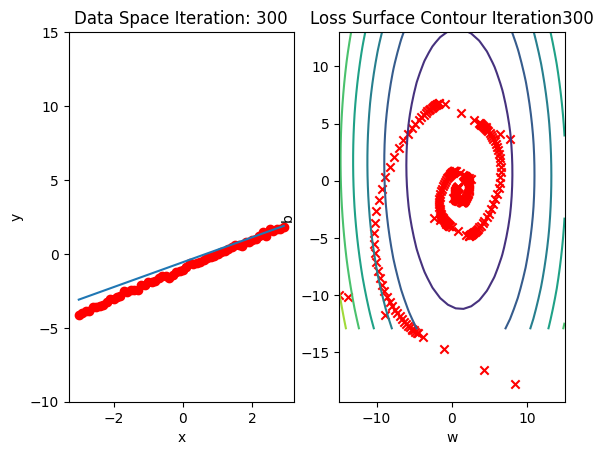

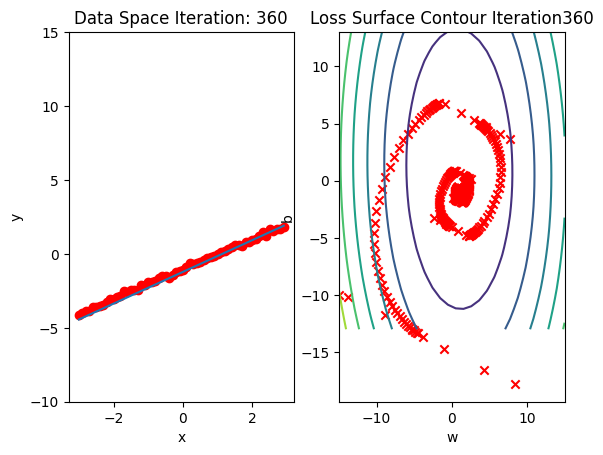

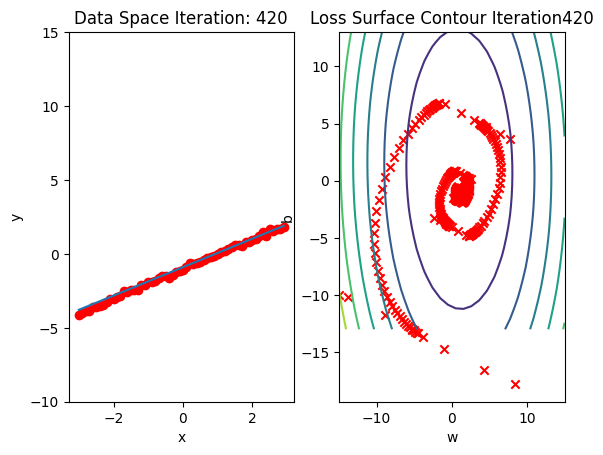

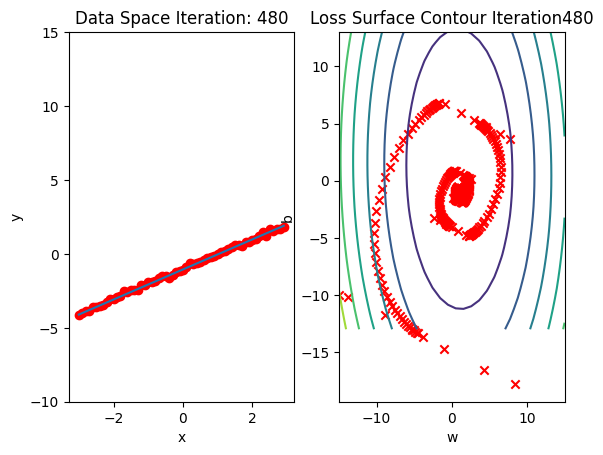

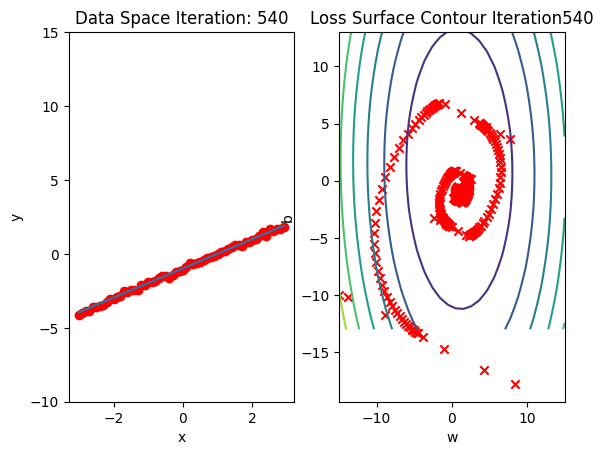

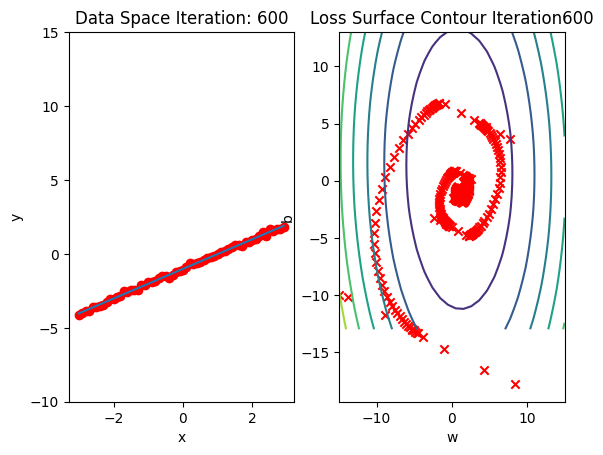

In [37]:
# Run 10 iterations

train_model_DataLoader(10)

Compare the loss of both batch gradient decent as SGD. Note that SGD converges to a minimum faster, that is, it decreases faster. 


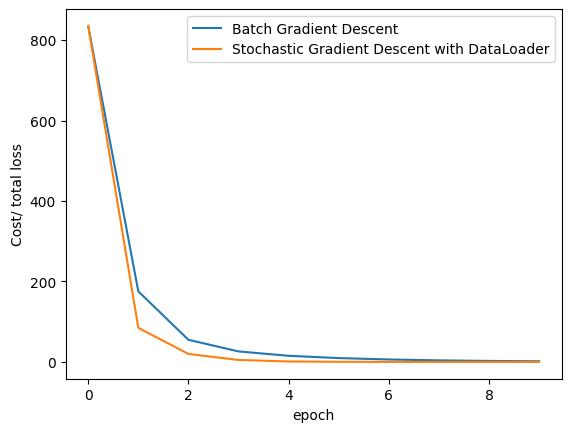

In [40]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD_,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<h3>Practice</h3>


For practice, try to use SGD with DataLoader to train model with 10 iterations. Store the total loss in <code>LOSS</code>. We are going to use it in the next question.


In [ ]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Double-click <b>here</b> for the solution.

<!-- 
def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS.append(criterion(Yhat, X))
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()
my_train_model(10)
-->


Plot the total loss


In [ ]:
# Practice: Plot the total loss using LOSS

# Type your code here

Double-click __here__ for the solution.
<!-- 
plt.plot(LOSS,label = "Stochastic Gradient Descent")
plt.xlabel('iteration')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()
-->


## About the Author:

Hi, My name is Juma Shafara. Am a Data Scientist and Instructor at DATAIDEA. I have taught hundreds of peope Programming, Data Analysis and Machine Learning. 

I also enjoy developing innovative algorithms and models that can drive insights and value. 

I regularly share some content that I find useful throughout my learning/teaching journey to simplify concepts in Machine Learning, Mathematics, Programming, and related topics on my website [jumashafara.dataidea.org](https://jumashafara.dataidea.org). 

Besides these technical stuff, I enjoy watching soccer, movies and reading mystery books.


<!--Empty Space for separating topics-->


<h2>What's on your mind? Put it in the comments!</h2>
<script src="https://utteranc.es/client.js"
        repo="dataideaorg/dataidea-science"
        issue-term="pathname"
        theme="github-light"
        crossorigin="anonymous"
        async>
</script>